# Laser Basic Tests

## Objective

The objective of this notebooks is to analyze the effectiveness of the JRT BB2X Laser Distance Sensor by Chengdu JRT Meter Technology Co. Ltd, at measuring distances of different lengths while stationary, under sunlight and dark conditions.

## Overview

- Like the TOF sensor's basic tests, I placed the sensor at fixed intervals of 0.5m, from 0.5m to 5.0m facing a wall, and allowed it to generate roughly 500 points of distance measurements.
- Both tests were conducted outdoors, but one in the very early morning with no sunlight, and when at mid day when the sun was its brightest.
- The data was collected through the default software provided and extracted into text files.

### Documentation

### Code

- As before, much of the code has been separated into different modules:
- [`data_loader`](./data_loader.py) contains helper functions to extract the data from the necessary files.
- [`graphing`](./graphing.py) contains helper functions to plot the graphs below.
- [`preprocessing`](./preprocessing.py) contains utility functions that manipulate the data.

In [31]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd

import laser
from data_loader import get_laser_data_from_txt, get_data_from_folder
from graphing import BasicGraphs
from preprocessing import DataCleaner, get_mean_measurements, get_standard_deviations

In [32]:
graphs = BasicGraphs()
data_cleaner = DataCleaner()

In [33]:
ACTUAL_DISTANCES = [0.5 * i for i in range(1, 11)]
INDOORS_DATA_PATH = pathlib.Path("./data/laser_basic_tests/indoors/")

# I need to get a fixed number of points for each interval.
indoors_raw_data = get_data_from_folder(INDOORS_DATA_PATH, get_laser_data_from_txt)
indoors_raw_data = laser.replace_intervals_with_distance(indoors_raw_data)

[0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.5

In [34]:
indoors_mean = get_mean_measurements(indoors_raw_data)

data = {
    "Actual Distance": ACTUAL_DISTANCES,
    "Indoors Mean": indoors_mean
}

df = pd.DataFrame(data)
display(df.T)

,0,1,2,3,4,5,6,7,8,9
Actual Distance,0.50,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
Indoors Mean,0.53,1.03,1.51,2.02,2.53,3.02,3.51,4.02,4.55,5.01


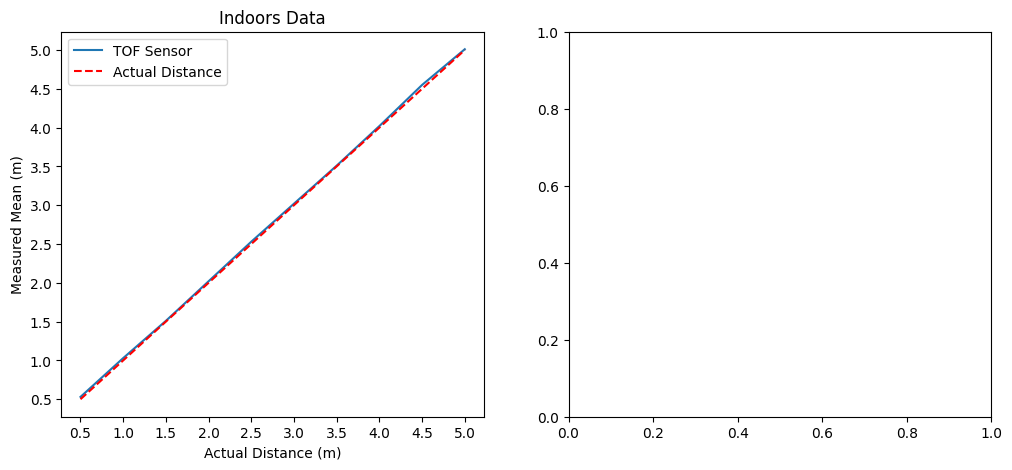

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
graphs.plot_mean_vs_actual_distance(axes[0], indoors_mean, title="Indoors Data")

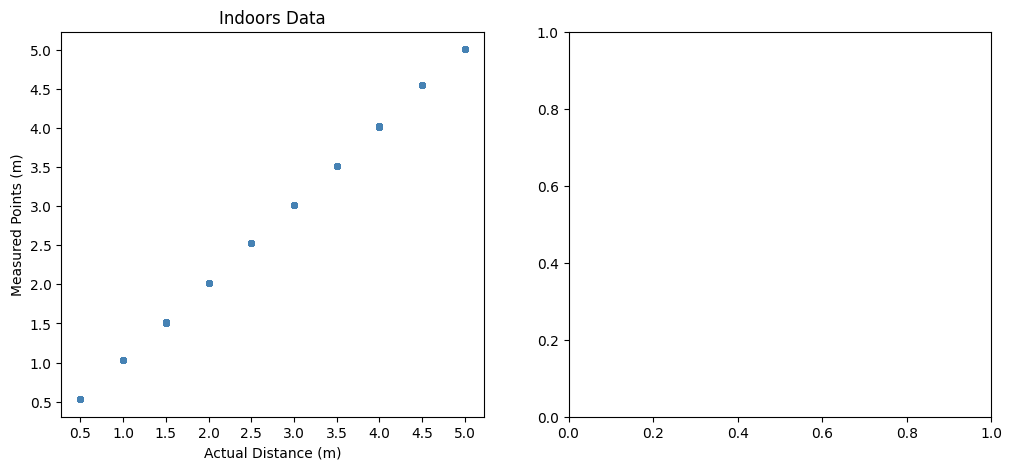

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
graphs.plot_scatter(axes[0], indoors_raw_data, title="Indoors Data")

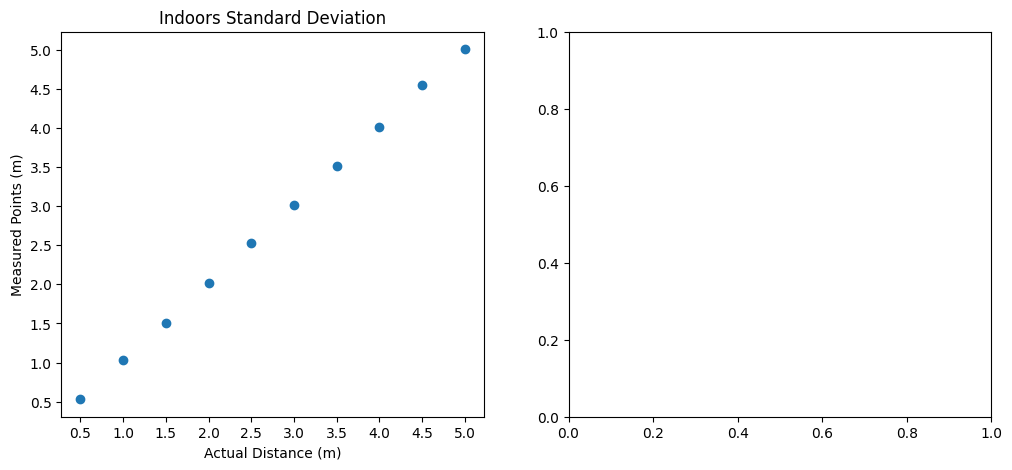

In [37]:
indoors_std = get_standard_deviations(indoors_mean)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
graphs.plot_std_errorbar(axes[0], indoors_mean, indoors_std, title="Indoors Standard Deviation")

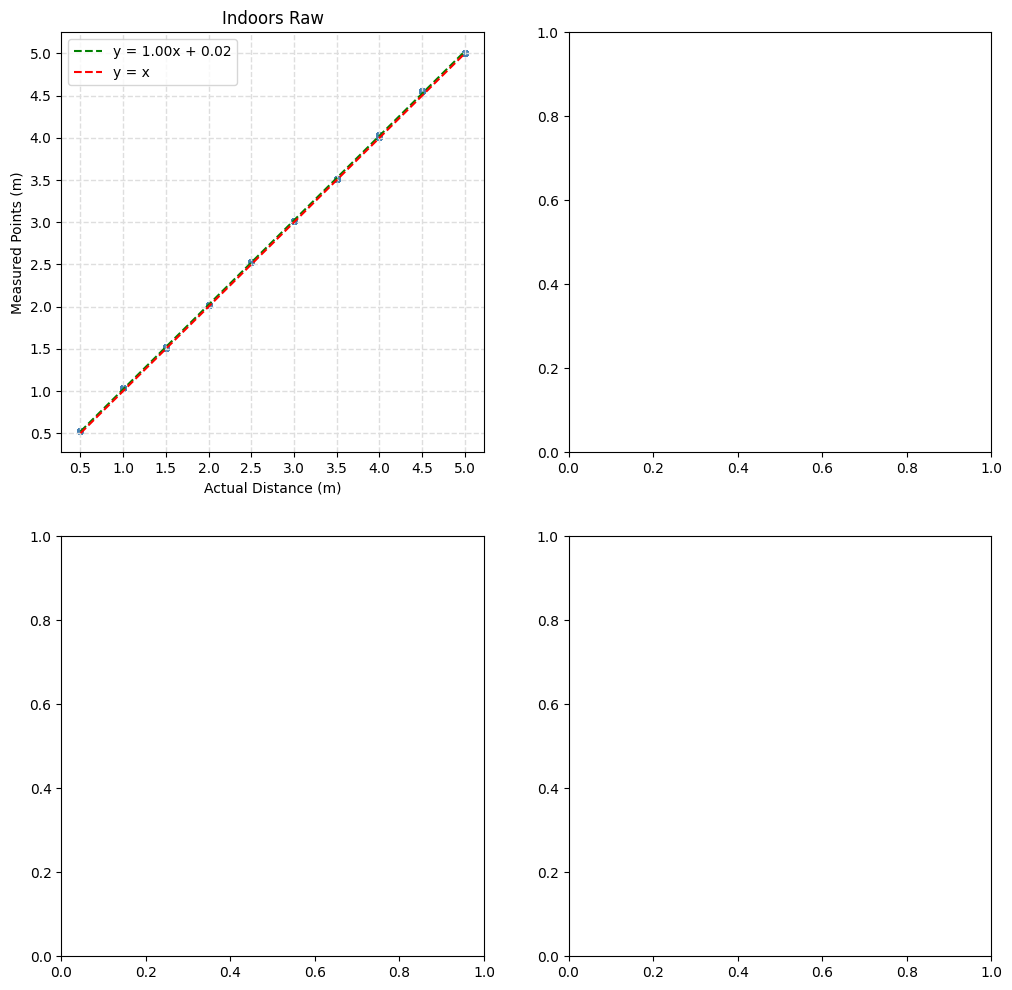

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

graphs.plot_best_fit_scatter(axes[0][0], indoors_raw_data, "Indoors Raw")